In [14]:
import pandas as pd

In [2]:
salesframe_df = pd.read_csv('sales_frame.csv')

In [3]:
salesmountain_df = pd.read_csv('sales_mountain.csv')

In [4]:
salesframe_df

,ProductID,Name,Price,category,SalesID,Quantity
0,210,HL Road Frame - Black 58,1431.50,Frame,1036,2
1,210,HL Road Frame - Black 58,1431.50,Frame,35,2
2,211,HL Road Frame - Red 58,1431.50,Frame,74,9
3,211,HL Road Frame - Red 58,1431.50,Frame,1075,9
4,223,HL Road Frame - Red 44,1431.50,Frame,1037,1
...,...,...,...,...,...,...
79,422,LL Mountain Frame - Silver 42,264.05,Frame,1013,10
80,432,LL Mountain Frame - Black 52,249.79,Frame,56,4
81,432,LL Mountain Frame - Black 52,249.79,Frame,1057,4
82,447,ML Mountain Frame-W - Silver 38,364.09,Frame,1032,4


In [5]:
salesmountain_df

,ProductID,Name,Price,category,SalesID,Quantity
0,189,HL Mountain Seat Assembly,196.92,Mountain,2,9
1,284,Mountain-200 Silver 38,2319.99,Mountain,3,2
2,498,Mountain-500 Black 52,539.99,Mountain,9,10
3,490,Mountain-500 Silver 42,564.99,Mountain,24,5
4,487,Mountain-400-W Silver 42,769.49,Mountain,27,7
...,...,...,...,...,...,...
91,383,Fender Set - Mountain,21.98,Mountain,1268,3
92,280,Mountain-100 Black 38,3374.99,Mountain,1288,7
93,414,ML Mountain Seat/Saddle,39.14,Mountain,1295,6
94,490,Mountain-500 Silver 42,564.99,Mountain,1296,10


# Clean the data (Category frame)

using *duplicated()* to check if there is any duplicated rows.
The duplicated method returns a series of Boolean True or False values. True if the row is a duplicate of a row above, and False otherwise.

In [6]:
salesframe_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
79,False
80,False
81,False
82,False


using *sum()* to count the number of duplicate rows (False is equivalent to 0 and True is equivalent to 1).

In [7]:
salesframe_df.duplicated().sum()

np.int64(0)

In [8]:
salesframe_df = salesframe_df.set_index('SalesID')

In [9]:
salesframe_df

,ProductID,Name,Price,category,Quantity
SalesID,,,,,
1036,210,HL Road Frame - Black 58,1431.50,Frame,2
35,210,HL Road Frame - Black 58,1431.50,Frame,2
74,211,HL Road Frame - Red 58,1431.50,Frame,9
1075,211,HL Road Frame - Red 58,1431.50,Frame,9
1037,223,HL Road Frame - Red 44,1431.50,Frame,1
...,...,...,...,...,...
1013,422,LL Mountain Frame - Silver 42,264.05,Frame,10
56,432,LL Mountain Frame - Black 52,249.79,Frame,4
1057,432,LL Mountain Frame - Black 52,249.79,Frame,4


using *info()* to check if there is any missing value (null) and datatype for each columns.

In [10]:
salesframe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 1036 to 31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ProductID  84 non-null     int64  
 1   Name       84 non-null     object 
 2   Price      84 non-null     float64
 3   category   84 non-null     object 
 4   Quantity   84 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.9+ KB


using *astype()* to change the datatype of Price from float to integer.

In [11]:
salesframe_df['Price'] = salesframe_df['Price'].astype(int)

Confirm the datatype of Price have been changed.

In [12]:
salesframe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 1036 to 31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ProductID  84 non-null     int64 
 1   Name       84 non-null     object
 2   Price      84 non-null     int64 
 3   category   84 non-null     object
 4   Quantity   84 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 3.9+ KB


Add a revenus coloumn.

In [13]:
salesframe_df['Revenue'] = salesframe_df['Price'] * salesframe_df['Quantity']

In [14]:
salesframe_df

,ProductID,Name,Price,category,Quantity,Revenue
SalesID,,,,,,
1036,210,HL Road Frame - Black 58,1431,Frame,2,2862
35,210,HL Road Frame - Black 58,1431,Frame,2,2862
74,211,HL Road Frame - Red 58,1431,Frame,9,12879
1075,211,HL Road Frame - Red 58,1431,Frame,9,12879
1037,223,HL Road Frame - Red 44,1431,Frame,1,1431
...,...,...,...,...,...,...
1013,422,LL Mountain Frame - Silver 42,264,Frame,10,2640
56,432,LL Mountain Frame - Black 52,249,Frame,4,996
1057,432,LL Mountain Frame - Black 52,249,Frame,4,996


Summarize revenue by Product in ascending order.

In [15]:
frame_summary = salesframe_df.groupby('Name').agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).sort_values('Revenue', ascending=False).reset_index()

In [16]:
frame_summary

,Name,Quantity,Revenue
0,HL Mountain Frame - Black 46,48,64752
1,HL Mountain Frame - Silver 44,28,38192
2,HL Road Frame - Black 44,26,37206
3,HL Touring Frame - Yellow 46,32,32096
4,HL Touring Frame - Yellow 60,28,28084
5,HL Road Frame - Red 52,18,25758
6,HL Road Frame - Red 58,18,25758
7,HL Touring Frame - Blue 60,20,20060
8,HL Road Frame - Black 52,14,20034
9,HL Road Frame - Red 48,12,17172


Top 10 Best-Selling Products in category frame by Revenue

In [17]:
frametop10 = frame_summary.head(10)

In [18]:
frametop10

,Name,Quantity,Revenue
0,HL Mountain Frame - Black 46,48,64752
1,HL Mountain Frame - Silver 44,28,38192
2,HL Road Frame - Black 44,26,37206
3,HL Touring Frame - Yellow 46,32,32096
4,HL Touring Frame - Yellow 60,28,28084
5,HL Road Frame - Red 52,18,25758
6,HL Road Frame - Red 58,18,25758
7,HL Touring Frame - Blue 60,20,20060
8,HL Road Frame - Black 52,14,20034
9,HL Road Frame - Red 48,12,17172


Total Revenue and Units Sold in category frame

In [19]:
total_revenue_frame = frame_summary['Revenue'].sum()

In [20]:
total_quantity_frame = frame_summary['Quantity'].sum()

In [21]:
total_revenue_frame

np.int64(441094)

In [22]:
total_quantity_frame

np.int64(510)

Sales pattern based on colour

In [23]:
import re

In [24]:
colors = ['Black', 'Silver', 'Red', 'Blue', 'Yellow']

In [25]:
def extract_color(name):
    for color in colors:
        if re.search(rf'\b{color}\b', name, re.IGNORECASE):
            return color
    return 'Unknown'

In [26]:
frame_summary['Color'] = frame_summary['Name'].apply(extract_color)

In [27]:
frame_summary

,Name,Quantity,Revenue,Color
0,HL Mountain Frame - Black 46,48,64752,Black
1,HL Mountain Frame - Silver 44,28,38192,Silver
2,HL Road Frame - Black 44,26,37206,Black
3,HL Touring Frame - Yellow 46,32,32096,Yellow
4,HL Touring Frame - Yellow 60,28,28084,Yellow
5,HL Road Frame - Red 52,18,25758,Red
6,HL Road Frame - Red 58,18,25758,Red
7,HL Touring Frame - Blue 60,20,20060,Blue
8,HL Road Frame - Black 52,14,20034,Black
9,HL Road Frame - Red 48,12,17172,Red


Find product average price, max and min

In [28]:
salesframe_df['Price'].describe()

,Price
count,84.000000
mean,903.809524
std,475.941033
min,249.000000
25%,348.000000
50%,1003.000000
75%,1364.000000
max,1431.000000


Group the same product and revenue together

In [29]:
frame_summary.groupby('Name')['Revenue'].sum()

,Revenue
Name,
HL Mountain Frame - Black 42,2698
HL Mountain Frame - Black 44,16188
HL Mountain Frame - Black 46,64752
HL Mountain Frame - Silver 44,38192
HL Road Frame - Black 44,37206
HL Road Frame - Black 52,20034
HL Road Frame - Black 58,5724
HL Road Frame - Red 44,5724
HL Road Frame - Red 48,17172


Total revenue

In [30]:
total_revenue_frame

np.int64(441094)

% of Revenue for each product in total revenue

In [31]:
frame_summary['% of Total Sales'] = (frame_summary['Revenue'] / total_revenue_frame) * 100

Round it to 2 decimal place

In [32]:
frame_summary['% of Total Sales'] = frame_summary['% of Total Sales'].round(2)

In [33]:
frame_summary

,Name,Quantity,Revenue,Color,% of Total Sales
0,HL Mountain Frame - Black 46,48,64752,Black,14.68
1,HL Mountain Frame - Silver 44,28,38192,Silver,8.66
2,HL Road Frame - Black 44,26,37206,Black,8.43
3,HL Touring Frame - Yellow 46,32,32096,Yellow,7.28
4,HL Touring Frame - Yellow 60,28,28084,Yellow,6.37
5,HL Road Frame - Red 52,18,25758,Red,5.84
6,HL Road Frame - Red 58,18,25758,Red,5.84
7,HL Touring Frame - Blue 60,20,20060,Blue,4.55
8,HL Road Frame - Black 52,14,20034,Black,4.54
9,HL Road Frame - Red 48,12,17172,Red,3.89


# Category mountain

Check for duplicate

In [34]:
salesmountain_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
91,False
92,False
93,False
94,False


Check for datatype

In [35]:
salesmountain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ProductID  96 non-null     int64  
 1   Name       96 non-null     object 
 2   Price      96 non-null     float64
 3   category   96 non-null     object 
 4   SalesID    96 non-null     int64  
 5   Quantity   96 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ KB


Change datatype

In [36]:
salesmountain_df['Price'] = salesmountain_df['Price'].astype(int)

In [37]:
salesmountain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ProductID  96 non-null     int64 
 1   Name       96 non-null     object
 2   Price      96 non-null     int64 
 3   category   96 non-null     object
 4   SalesID    96 non-null     int64 
 5   Quantity   96 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 4.6+ KB


Add Revenue to a new column

In [38]:
salesmountain_df['Revenue'] = salesmountain_df['Price'] * salesmountain_df['Quantity']

In [39]:
salesmountain_df

,ProductID,Name,Price,category,SalesID,Quantity,Revenue
0,189,HL Mountain Seat Assembly,196,Mountain,2,9,1764
1,284,Mountain-200 Silver 38,2319,Mountain,3,2,4638
2,498,Mountain-500 Black 52,539,Mountain,9,10,5390
3,490,Mountain-500 Silver 42,564,Mountain,24,5,2820
4,487,Mountain-400-W Silver 42,769,Mountain,27,7,5383
...,...,...,...,...,...,...,...
91,383,Fender Set - Mountain,21,Mountain,1268,3,63
92,280,Mountain-100 Black 38,3374,Mountain,1288,7,23618
93,414,ML Mountain Seat/Saddle,39,Mountain,1295,6,234
94,490,Mountain-500 Silver 42,564,Mountain,1296,10,5640


Summarize revenue by Product in ascending order.

In [40]:
mountain_summary = salesmountain_df.groupby('Name').agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).sort_values('Revenue', ascending=False).reset_index()

In [41]:
mountain_summary

,Name,Quantity,Revenue
0,Mountain-100 Silver 38,28,95172
1,Mountain-200 Black 38,32,73408
2,Mountain-100 Black 42,16,53984
3,Mountain-100 Black 38,14,47236
4,Mountain-100 Black 48,12,40488
5,Mountain-400-W Silver 46,32,24608
6,Mountain-300 Black 48,20,21580
7,Mountain-500 Silver 48,36,20304
8,Mountain-500 Silver 42,30,16920
9,Mountain End Caps,24,14160


Export data to excel

In [42]:
mountain_summary.to_excel('mountain_summary.xlsx', sheet_name='mountain_summary')

find product average price, max, and min.

In [43]:
salesmountain_df['Price'].describe()

,Price
count,96.00000
mean,868.56250
std,1091.65296
min,4.00000
25%,39.75000
50%,564.00000
75%,955.25000
max,3399.00000


Top 10 product sales

In [44]:
mountaintop10 = mountain_summary.head(10)

In [45]:
mountaintop10

,Name,Quantity,Revenue
0,Mountain-100 Silver 38,28,95172
1,Mountain-200 Black 38,32,73408
2,Mountain-100 Black 42,16,53984
3,Mountain-100 Black 38,14,47236
4,Mountain-100 Black 48,12,40488
5,Mountain-400-W Silver 46,32,24608
6,Mountain-300 Black 48,20,21580
7,Mountain-500 Silver 48,36,20304
8,Mountain-500 Silver 42,30,16920
9,Mountain End Caps,24,14160


Total revenue

In [46]:
total_revenue_mountain = mountain_summary['Revenue'].sum()

In [48]:
total_revenue_mountain

np.int64(498890)

Total quantity

In [47]:
total_Quantity_mountain = mountain_summary['Quantity'].sum()

In [49]:
total_Quantity_mountain

np.int64(538)

% of Total Sales

In [50]:
mountain_summary['% of Total Sales'] = (mountain_summary['Revenue'] / total_revenue_mountain) * 100

In [51]:
mountain_summary['% of Total Sales'] = mountain_summary['% of Total Sales'].round(2)

In [52]:
mountain_summary

,Name,Quantity,Revenue,% of Total Sales
0,Mountain-100 Silver 38,28,95172,19.08
1,Mountain-200 Black 38,32,73408,14.71
2,Mountain-100 Black 42,16,53984,10.82
3,Mountain-100 Black 38,14,47236,9.47
4,Mountain-100 Black 48,12,40488,8.12
5,Mountain-400-W Silver 46,32,24608,4.93
6,Mountain-300 Black 48,20,21580,4.33
7,Mountain-500 Silver 48,36,20304,4.07
8,Mountain-500 Silver 42,30,16920,3.39
9,Mountain End Caps,24,14160,2.84


In [ ]:
mountain_summary.to_excel('mountain_summary.xlsx', sheet_name='mountain_summary')

# Breakdown of Sales by Product

Read csv

In [15]:
Sales_df = pd.read_csv('sales.csv')

In [16]:
Sales_df

,ProductID,SalesID,Name,Price,Quantity
0,2,81,Bearing Ball,0.80,3
1,2,123,Bearing Ball,0.80,2
2,2,1082,Bearing Ball,0.80,3
3,2,1124,Bearing Ball,0.80,2
4,4,1006,Headset Ball Bearings,0.00,8
...,...,...,...,...,...
595,501,1285,HL Bottom Bracket,121.49,6
596,504,275,Road-750 Black 52,539.99,4
597,504,227,Road-750 Black 52,539.99,4
598,504,1228,Road-750 Black 52,539.99,4


Check for duplicate

In [17]:
Sales_df.duplicated().sum()

np.int64(0)

Check datatype

In [18]:
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ProductID  600 non-null    int64  
 1   SalesID    600 non-null    int64  
 2   Name       600 non-null    object 
 3   Price      600 non-null    float64
 4   Quantity   600 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 23.6+ KB


Find product with the price == 0

In [19]:
Sales_df.loc[Sales_df['Price'] == 0, 'Name']

,Name
4,Headset Ball Bearings
5,Headset Ball Bearings
10,Chainring Bolts
11,Chainring Bolts
30,Flat Washer 1
31,Flat Washer 1
32,Flat Washer 1
33,Flat Washer 1
34,Flat Washer 2
35,Flat Washer 2


Remove data if the price is 0

In [22]:
Sales_df = Sales_df[Sales_df['Price'] != 0]

Add a new column 'Revenue'

In [23]:
Sales_df['revenue'] = Sales_df['Price'] * Sales_df['Quantity']

/tmp/ipython-input-23-179978850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sales_df['revenue'] = Sales_df['Price'] * Sales_df['Quantity']


Group the sales with the same product name.

In [27]:
Sales_summary = Sales_df.groupby('Name').agg({
    'Quantity': 'sum',
    'revenue': 'sum'
  }).sort_values('revenue', ascending=False).reset_index()

In [30]:
Sales_summary = Sales_summary.round(2)

In [46]:
Sales_summary

,Name,Quantity,revenue
0,Mountain-100 Silver 38,28,95199.72
1,Road-150 Red 48,24,85878.48
2,Road-150 Red 44,22,78721.94
3,Mountain-200 Black 38,32,73439.68
4,HL Mountain Frame - Black 46,48,64780.80
...,...,...,...
200,Womens Mountain Shorts L,2,139.98
201,LL Touring Seat/Saddle,4,108.48
202,Mountain Tire Tube,6,29.94
203,Bearing Ball,10,8.00


Top 10 sales

In [39]:
sales_top10 = Sales_summary.head(10)

In [42]:
sales_top10.to_excel('Sales_top10.xlsx', sheet_name='Sales_top10')

In [43]:
sales_top10

,Quantity,revenue
Name,,
Mountain-100 Silver 38,28,95199.72
Road-150 Red 48,24,85878.48
Road-150 Red 44,22,78721.94
Mountain-200 Black 38,32,73439.68
HL Mountain Frame - Black 46,48,64780.80
Mountain-100 Black 42,16,53999.84
Road-150 Red 52,14,50095.78
Touring-1000 Blue 50,20,47681.40
Road-350-W Yellow 40,28,47627.72


Top 10 by quantity sold and top 10 by revenue

In [45]:
top_quantity = Sales_summary.sort_values(by='Quantity', ascending=False).head(10)

# Sort by revenue
top_revenue = Sales_summary.sort_values(by='revenue', ascending=False).head(10)

print("Top 10 by Quantity Sold:")
print(top_quantity)

print("\nTop 10 by Revenue:")
print(top_revenue)

Top 10 by Quantity Sold:
                             Name  Quantity   revenue
4    HL Mountain Frame - Black 46        48  64780.80
17                      Lock Ring        40  33192.00
29         Mountain-500 Silver 48        36  20339.64
94                      Hex Nut 4        36   5688.00
27                 Handlebar Tube        34  21651.20
123                    Hex Nut 22        34   2597.60
160           LL Road Seat/Saddle        34    922.08
45                  Flat Washer 5        32  13363.20
18   HL Touring Frame - Yellow 46        32  32125.12
22       Mountain-400-W Silver 46        32  24623.68

Top 10 by Revenue:
                           Name  Quantity   revenue
0        Mountain-100 Silver 38        28  95199.72
1               Road-150 Red 48        24  85878.48
2               Road-150 Red 44        22  78721.94
3         Mountain-200 Black 38        32  73439.68
4  HL Mountain Frame - Black 46        48  64780.80
5         Mountain-100 Black 42        16  53999.

# Customers loyalty

In [43]:
import pandas as pd

In [44]:
customers_df = pd.read_csv('customers.csv')

In [45]:
customers_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
295,False
296,False
297,False
298,False


In [81]:
customers_df

,SalesID,SalesDate,CustomerID,customerName,ProductID,Quantity
0,48,2022-10-18,1,Aaron Yang,294,4
1,203,2022-12-27,1,Aaron Yang,345,6
2,13,2022-06-18,3,Adam Young,20,6
3,40,2022-01-01,4,Alan Ye,397,1
4,235,2022-06-28,4,Alan Ye,218,9
...,...,...,...,...,...,...
295,243,2022-05-30,357,Wyatt Young,66,5
296,197,2022-08-27,358,Xavier Young,381,3
297,49,2022-08-05,358,Xavier Young,251,9
298,20,2022-11-29,359,Yolanda Yuan,407,9


In [47]:
customers_df.iloc[0]

,0
SalesDate,2022-10-18
SalesID,48
CustomerID,1
FirstName,Aaron
LastName,Yang
ProductID,294
Quantity,4


In [48]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SalesDate   300 non-null    object
 1   SalesID     300 non-null    int64 
 2   CustomerID  300 non-null    int64 
 3   FirstName   300 non-null    object
 4   LastName    300 non-null    object
 5   ProductID   300 non-null    int64 
 6   Quantity    300 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 16.5+ KB


Combine firstname and lastname to customername

In [49]:
customers_df['customerName'] = customers_df['FirstName'] + ' ' + customers_df['LastName']

In [50]:
customers_df = customers_df.drop(['FirstName', 'LastName'], axis=1)

Reorder the column

In [51]:
customers_df = customers_df[['SalesID' ,'SalesDate', 'CustomerID', 'customerName', 'ProductID', 'Quantity']]

In [52]:
customers_df

,SalesID,SalesDate,CustomerID,customerName,ProductID,Quantity
0,48,2022-10-18,1,Aaron Yang,294,4
1,203,2022-12-27,1,Aaron Yang,345,6
2,13,2022-06-18,3,Adam Young,20,6
3,40,2022-01-01,4,Alan Ye,397,1
4,235,2022-06-28,4,Alan Ye,218,9
...,...,...,...,...,...,...
295,243,2022-05-30,357,Wyatt Young,66,5
296,197,2022-08-27,358,Xavier Young,381,3
297,49,2022-08-05,358,Xavier Young,251,9
298,20,2022-11-29,359,Yolanda Yuan,407,9


Count customers frequency

In [72]:
customers_counts = customers_df['customerName'].value_counts()

If customer counts = 1, they are one time customers

In [54]:
one_time_customers = (customer_counts == 1).sum()

In [82]:
one_time_customers

np.int64(125)

If customer counts > 1, they are repeat customers

In [55]:
repeat_customers = (customer_counts > 1).sum()

In [83]:
repeat_customers

np.int64(74)

In [73]:
total_customers = customer_counts.count()

In [57]:
percent_one_time = round(one_time_customers / total_customers * 100, 2)

In [58]:
percent_repeat = round(repeat_customers / total_customers * 100, 2)

In [59]:
percent_one_time

np.float64(62.81)

In [60]:
percent_repeat

np.float64(37.19)

Create a pie chart to show distribution of customers

In [61]:
import matplotlib.pyplot as plt

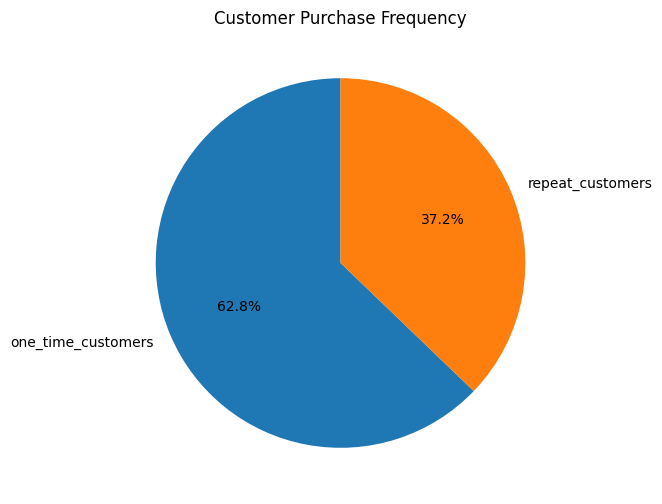

In [62]:
# Create a new figure for the pie chart
plt.figure(figsize=(6, 6))

# Pie chart data
labels = ['one_time_customers', 'repeat_customers']
sizes = [percent_one_time, percent_repeat]

# Create a pie chart

plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90
        )

# Add a title
plt.title("Customer Purchase Frequency")

# Display the pie chart
plt.show()

In [63]:
total_orders = customers_df['SalesID'].nunique()

In [79]:
average_orders_per_customer = total_orders / total_customers

In [67]:
total_orders

300

In [77]:
total_customers

np.int64(199)

In [80]:
average_orders_per_customer

np.float64(1.5075376884422111)